In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(pd.__version__)

0.20.3


# Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro)

Creating a [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series) by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame) by passing a numpy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.028027,-0.360410,1.163595,-2.529031
2013-01-02,-0.991572,-0.831900,2.464531,-2.785967
2013-01-03,0.526305,0.936407,0.382639,0.398280
2013-01-04,-0.540820,0.313134,-0.419945,0.669799
2013-01-05,0.916428,-0.046790,-0.797838,0.529353
2013-01-06,-0.330862,-0.208117,-0.343704,-0.794824


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Viewing Data
See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics)

See the top & bottom rows of the frame

In [9]:
df.head()

,A,B,C,D
2013-01-01,0.028027,-0.360410,1.163595,-2.529031
2013-01-02,-0.991572,-0.831900,2.464531,-2.785967
2013-01-03,0.526305,0.936407,0.382639,0.398280
2013-01-04,-0.540820,0.313134,-0.419945,0.669799
2013-01-05,0.916428,-0.046790,-0.797838,0.529353


In [10]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.540820,0.313134,-0.419945,0.669799
2013-01-05,0.916428,-0.046790,-0.797838,0.529353
2013-01-06,-0.330862,-0.208117,-0.343704,-0.794824


---
Display the index, columns, and the underlying numpy data

In [11]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [13]:
df.values

array([[ 0.02802727, -0.36041005,  1.16359493, -2.52903129],
       [-0.99157213, -0.83189969,  2.46453066, -2.78596724],
       [ 0.52630543,  0.93640725,  0.38263931,  0.39827996],
       [-0.54082028,  0.31313429, -0.41994496,  0.66979882],
       [ 0.91642751, -0.04678992, -0.797838  ,  0.52935313],
       [-0.33086221, -0.20811696, -0.34370429, -0.79482421]])

---
Describe shows a quick statistic summary of your data

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.065416,-0.032946,0.408213,-0.752065
std,0.703863,0.605946,1.225192,1.567368
min,-0.991572,-0.831900,-0.797838,-2.785967
25%,-0.488331,-0.322337,-0.400885,-2.095480
50%,-0.151417,-0.127453,0.019468,-0.198272
75%,0.401736,0.223153,0.968356,0.496585
max,0.916428,0.936407,2.464531,0.669799


---
Transposing your data

In [15]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.028027,-0.991572,0.526305,-0.540820,0.916428,-0.330862
B,-0.360410,-0.831900,0.936407,0.313134,-0.046790,-0.208117
C,1.163595,2.464531,0.382639,-0.419945,-0.797838,-0.343704
D,-2.529031,-2.785967,0.398280,0.669799,0.529353,-0.794824


---
Sorting by an axis

In [16]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-2.529031,1.163595,-0.360410,0.028027
2013-01-02,-2.785967,2.464531,-0.831900,-0.991572
2013-01-03,0.398280,0.382639,0.936407,0.526305
2013-01-04,0.669799,-0.419945,0.313134,-0.540820
2013-01-05,0.529353,-0.797838,-0.046790,0.916428
2013-01-06,-0.794824,-0.343704,-0.208117,-0.330862


In [18]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,-0.330862,-0.208117,-0.343704,-0.794824
2013-01-05,0.916428,-0.046790,-0.797838,0.529353
2013-01-04,-0.540820,0.313134,-0.419945,0.669799
2013-01-03,0.526305,0.936407,0.382639,0.398280
2013-01-02,-0.991572,-0.831900,2.464531,-2.785967
2013-01-01,0.028027,-0.360410,1.163595,-2.529031


---
Sorting by values

In [19]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,-0.991572,-0.831900,2.464531,-2.785967
2013-01-01,0.028027,-0.360410,1.163595,-2.529031
2013-01-06,-0.330862,-0.208117,-0.343704,-0.794824
2013-01-05,0.916428,-0.046790,-0.797838,0.529353
2013-01-04,-0.540820,0.313134,-0.419945,0.669799
2013-01-03,0.526305,0.936407,0.382639,0.398280


# Selection
See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)
## Getting
Selecting a single column, which yields a Series, equivalent to df.A

In [20]:
df['A']

2013-01-01    0.028027
2013-01-02   -0.991572
2013-01-03    0.526305
2013-01-04   -0.540820
2013-01-05    0.916428
2013-01-06   -0.330862
Freq: D, Name: A, dtype: float64

---
Selecting via [ ], which slices the rows.

In [21]:
df[0:3]

,A,B,C,D
2013-01-01,0.028027,-0.360410,1.163595,-2.529031
2013-01-02,-0.991572,-0.831900,2.464531,-2.785967
2013-01-03,0.526305,0.936407,0.382639,0.398280


In [22]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.991572,-0.831900,2.464531,-2.785967
2013-01-03,0.526305,0.936407,0.382639,0.398280
2013-01-04,-0.540820,0.313134,-0.419945,0.669799


## Selection by Label
See more in [Selection by Label](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)

For getting a cross section using a label

In [23]:
df.loc[dates[0]]

A    0.028027
B   -0.360410
C    1.163595
D   -2.529031
Name: 2013-01-01 00:00:00, dtype: float64

---
Selecting on a multi-axis by label

In [24]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.028027,-0.360410
2013-01-02,-0.991572,-0.831900
2013-01-03,0.526305,0.936407
2013-01-04,-0.540820,0.313134
2013-01-05,0.916428,-0.046790
2013-01-06,-0.330862,-0.208117


Showing label slicing, both endpoints are **included**

In [25]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.991572,-0.831900
2013-01-03,0.526305,0.936407
2013-01-04,-0.540820,0.313134


Reduction in the dimensions of the returned object

In [26]:
df.loc['20130102',['A','B']]

A   -0.991572
B   -0.831900
Name: 2013-01-02 00:00:00, dtype: float64

---
For getting a scalar value

In [27]:
df.loc[dates[0],'A']

0.028027272947839108

For getting fast access to a scalar (equiv to the prior method)

In [28]:
df.at[dates[0],'A']

0.028027272947839108

## Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [29]:
df.iloc[3]

A   -0.540820
B    0.313134
C   -0.419945
D    0.669799
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [30]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.540820,0.313134
2013-01-05,0.916428,-0.046790


By lists of integer position locations, similar to the numpy/python style

In [31]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.991572,2.464531
2013-01-03,0.526305,0.382639
2013-01-05,0.916428,-0.797838


For slicing rows explicitly

In [32]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.991572,-0.831900,2.464531,-2.785967
2013-01-03,0.526305,0.936407,0.382639,0.398280


For slicing columns explicitly

In [33]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.360410,1.163595
2013-01-02,-0.831900,2.464531
2013-01-03,0.936407,0.382639
2013-01-04,0.313134,-0.419945
2013-01-05,-0.046790,-0.797838
2013-01-06,-0.208117,-0.343704


For getting a value explicitly

In [34]:
df.iloc[1,1]

-0.83189969149891485

For getting fast access to a scalar (equiv to the prior method)

In [35]:
df.iat[1,1]

-0.83189969149891485

## Boolean Indexing

Using a single column’s values to select data.

In [36]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.028027,-0.360410,1.163595,-2.529031
2013-01-03,0.526305,0.936407,0.382639,0.398280
2013-01-05,0.916428,-0.046790,-0.797838,0.529353


Selecting values from a DataFrame where a boolean condition is met.

In [37]:
df[df > 0]

,A,B,C,D
2013-01-01,0.028027,NaN,1.163595,NaN
2013-01-02,NaN,NaN,2.464531,NaN
2013-01-03,0.526305,0.936407,0.382639,0.398280
2013-01-04,NaN,0.313134,NaN,0.669799
2013-01-05,0.916428,NaN,NaN,0.529353
2013-01-06,NaN,NaN,NaN,NaN


Using the isin() method for filtering:

In [38]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.028027,-0.360410,1.163595,-2.529031,one
2013-01-02,-0.991572,-0.831900,2.464531,-2.785967,one
2013-01-03,0.526305,0.936407,0.382639,0.398280,two
2013-01-04,-0.540820,0.313134,-0.419945,0.669799,three
2013-01-05,0.916428,-0.046790,-0.797838,0.529353,four
2013-01-06,-0.330862,-0.208117,-0.343704,-0.794824,three


In [39]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.526305,0.936407,0.382639,0.398280,two
2013-01-05,0.916428,-0.046790,-0.797838,0.529353,four


## Setting
Setting a new column automatically aligns the data by the indexes

In [40]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [41]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.028027,-0.360410,1.163595,-2.529031,NaN
2013-01-02,-0.991572,-0.831900,2.464531,-2.785967,1.0
2013-01-03,0.526305,0.936407,0.382639,0.398280,2.0
2013-01-04,-0.540820,0.313134,-0.419945,0.669799,3.0
2013-01-05,0.916428,-0.046790,-0.797838,0.529353,4.0
2013-01-06,-0.330862,-0.208117,-0.343704,-0.794824,5.0


Setting values by label<br>
Setting values by position<br>
Setting by assigning with a numpy array

In [43]:
df.at[dates[0],'A'] = 0
df.iat[0,1] = 0
df.loc[:,'D'] = np.array([5] * len(df))

In [44]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.163595,5,NaN
2013-01-02,-0.991572,-0.831900,2.464531,5,1.0
2013-01-03,0.526305,0.936407,0.382639,5,2.0
2013-01-04,-0.540820,0.313134,-0.419945,5,3.0
2013-01-05,0.916428,-0.046790,-0.797838,5,4.0
2013-01-06,-0.330862,-0.208117,-0.343704,5,5.0


A where operation with setting.

In [48]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.163595,-5,NaN
2013-01-02,-0.991572,-0.831900,-2.464531,-5,-1.0
2013-01-03,-0.526305,-0.936407,-0.382639,-5,-2.0
2013-01-04,-0.540820,-0.313134,-0.419945,-5,-3.0
2013-01-05,-0.916428,-0.046790,-0.797838,-5,-4.0
2013-01-06,-0.330862,-0.208117,-0.343704,-5,-5.0


# Missing Data
pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. See the [Missing Data section](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data)

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [49]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.163595,5,NaN,NaN
2013-01-02,-0.991572,-0.831900,2.464531,5,1.0,NaN
2013-01-03,0.526305,0.936407,0.382639,5,2.0,NaN
2013-01-04,-0.540820,0.313134,-0.419945,5,3.0,NaN


In [50]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.163595,5,NaN,1.0
2013-01-02,-0.991572,-0.831900,2.464531,5,1.0,1.0
2013-01-03,0.526305,0.936407,0.382639,5,2.0,NaN
2013-01-04,-0.540820,0.313134,-0.419945,5,3.0,NaN


To drop any rows that have missing data.

In [53]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.991572,-0.8319,2.464531,5,1.0,1.0


Filling missing data

In [54]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.163595,5,5.0,1.0
2013-01-02,-0.991572,-0.831900,2.464531,5,1.0,1.0
2013-01-03,0.526305,0.936407,0.382639,5,2.0,5.0
2013-01-04,-0.540820,0.313134,-0.419945,5,3.0,5.0


To get the boolean mask where values are `nan`

In [59]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations
See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

## Stats
Operations in general *exclude* missing data.

Performing a descriptive statistic

In [63]:
df.mean()

A   -0.070087
B    0.027122
C    0.408213
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [64]:
df.mean(1)

2013-01-01    1.540899
2013-01-02    1.328212
2013-01-03    1.769070
2013-01-04    1.470474
2013-01-05    1.814360
2013-01-06    1.823463
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [65]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [67]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.163595,5,NaN
2013-01-02,-0.991572,-0.831900,2.464531,5,1.0
2013-01-03,0.526305,0.936407,0.382639,5,2.0
2013-01-04,-0.540820,0.313134,-0.419945,5,3.0
2013-01-05,0.916428,-0.046790,-0.797838,5,4.0
2013-01-06,-0.330862,-0.208117,-0.343704,5,5.0


In [68]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.473695,-0.063593,-0.617361,4.0,1.0
2013-01-04,-3.540820,-2.686866,-3.419945,2.0,0.0
2013-01-05,-4.083572,-5.046790,-5.797838,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply
Applying functions to the data

In [69]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.163595,5,NaN
2013-01-02,-0.991572,-0.831900,3.628126,10,1.0
2013-01-03,-0.465267,0.104508,4.010765,15,3.0
2013-01-04,-1.006087,0.417642,3.590820,20,6.0
2013-01-05,-0.089659,0.370852,2.792982,25,10.0
2013-01-06,-0.420522,0.162735,2.449278,30,15.0


In [70]:
df.apply(lambda x: x.max() - x.min())

A    1.908000
B    1.768307
C    3.262369
D    0.000000
F    4.000000
dtype: float64

## Histogramming
See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [71]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    1
2    6
3    0
4    4
5    0
6    6
7    5
8    6
9    5
dtype: int32

In [72]:
s.value_counts()

6    3
5    2
4    2
0    2
1    1
dtype: int64

## String Methods
Series is equipped with a set of string processing methods in the *str* attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in *str* generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [74]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge
## Concat
pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with `concat()`:

In [75]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.625418,0.581366,-1.474496,1.144968
1,-1.214077,2.364702,1.353717,-0.021426
2,-0.003721,-0.864083,0.767809,-0.170864
3,1.139783,-1.008696,-0.465576,0.670573
4,0.270579,-0.294175,-0.557942,-0.868558
5,-1.786068,-0.092670,-1.036783,2.868043
6,1.636427,-2.035866,1.058445,0.511121
7,1.206603,-1.386371,-1.444002,0.708740
8,-1.059806,1.043591,-1.654033,-0.822565
9,0.237548,0.269735,-0.375566,-1.030989


In [76]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

pieces

[          0         1         2         3
 0 -0.625418  0.581366 -1.474496  1.144968
 1 -1.214077  2.364702  1.353717 -0.021426
 2 -0.003721 -0.864083  0.767809 -0.170864,
           0         1         2         3
 3  1.139783 -1.008696 -0.465576  0.670573
 4  0.270579 -0.294175 -0.557942 -0.868558
 5 -1.786068 -0.092670 -1.036783  2.868043
 6  1.636427 -2.035866  1.058445  0.511121,
           0         1         2         3
 7  1.206603 -1.386371 -1.444002  0.708740
 8 -1.059806  1.043591 -1.654033 -0.822565
 9  0.237548  0.269735 -0.375566 -1.030989]

In [77]:
pd.concat(pieces)

,0,1,2,3
0,-0.625418,0.581366,-1.474496,1.144968
1,-1.214077,2.364702,1.353717,-0.021426
2,-0.003721,-0.864083,0.767809,-0.170864
3,1.139783,-1.008696,-0.465576,0.670573
4,0.270579,-0.294175,-0.557942,-0.868558
5,-1.786068,-0.092670,-1.036783,2.868043
6,1.636427,-2.035866,1.058445,0.511121
7,1.206603,-1.386371,-1.444002,0.708740
8,-1.059806,1.043591,-1.654033,-0.822565
9,0.237548,0.269735,-0.375566,-1.030989


## Join
SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [78]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [79]:
right

,key,rval
0,foo,4
1,foo,5


In [80]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [81]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [82]:
right

,key,rval
0,foo,4
1,bar,5


In [83]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Append
Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [85]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.789692,1.292343,0.360185,0.771908
1,1.064073,0.268480,0.120430,0.941648
2,2.177344,1.067191,0.538639,-1.083196
3,-0.765472,-1.228297,-0.655719,-1.615504
4,-0.666083,-0.686281,-0.772435,-0.491080
5,-0.337581,0.102382,-1.489162,0.721520
6,0.776080,0.082940,0.647504,-0.397358
7,-1.620518,1.452310,0.095396,-1.251835


In [87]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,0.789692,1.292343,0.360185,0.771908
1,1.064073,0.268480,0.120430,0.941648
2,2.177344,1.067191,0.538639,-1.083196
3,-0.765472,-1.228297,-0.655719,-1.615504
4,-0.666083,-0.686281,-0.772435,-0.491080
5,-0.337581,0.102382,-1.489162,0.721520
6,0.776080,0.082940,0.647504,-0.397358
7,-1.620518,1.452310,0.095396,-1.251835
8,-0.765472,-1.228297,-0.655719,-1.615504


# Grouping
By “group by” we are referring to a process involving one or more of the following steps

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [91]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.833277,-0.705864
1,bar,one,-1.818199,-0.226720
2,foo,two,0.005724,-0.473667
3,bar,three,-0.600463,-1.363728
4,foo,two,0.265493,-0.702246
5,bar,two,-0.618893,0.929834
6,foo,one,0.413377,0.395957
7,foo,three,0.313230,-0.611750


Grouping and then applying a function `sum` to the resulting groups.

In [92]:
df.groupby('A').sum()

,C,D
A,,
bar,-3.037555,-0.660614
foo,0.164547,-2.097570


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [93]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.818199 -0.226720
    three -0.600463 -1.363728
    two   -0.618893  0.929834
foo one   -0.419900 -0.309907
    three  0.313230 -0.611750
    two    0.271217 -1.175913

## Reshaping
See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).
## Stack

In [94]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                      'foo', 'foo', 'qux', 'qux'],
                     ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.329185  0.921960
      two     1.535655  0.214827
baz   one    -0.282179  0.673851
      two     0.656344  0.627308

The `stack()` method “compresses” a level in the DataFrame’s columns.

In [96]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.329185
               B    0.921960
       two     A    1.535655
               B    0.214827
baz    one     A   -0.282179
               B    0.673851
       two     A    0.656344
               B    0.627308
dtype: float64

With a “stacked” DataFrame or Series (having a `MultiIndex` as the `index`), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [97]:
stacked.unstack()

A         B
first second                    
bar   one     1.329185  0.921960
      two     1.535655  0.214827
baz   one    -0.282179  0.673851
      two     0.656344  0.627308

In [98]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.329185  1.535655
      B  0.921960  0.214827
baz   A -0.282179  0.656344
      B  0.673851  0.627308

In [99]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.329185 -0.282179
       B  0.921960  0.673851
two    A  1.535655  0.656344
       B  0.214827  0.627308

## Pivot Tables
See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [100]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

df

,A,B,C,D,E
0,one,A,foo,-0.246108,2.686480
1,one,B,foo,2.478012,-0.010205
2,two,C,foo,0.283509,1.046506
3,three,A,bar,-0.927052,1.039506
4,one,B,bar,-0.498449,-0.051141
5,one,C,bar,-0.670745,0.977847
6,two,A,foo,1.936088,-0.439581
7,three,B,foo,1.102570,-1.397827
8,one,C,foo,0.261125,0.464100
9,one,A,bar,0.941409,1.695919


We can produce pivot tables from this data very easily:

In [101]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.941409 -0.246108
      B -0.498449  2.478012
      C -0.670745  0.261125
three A -0.927052       NaN
      B       NaN  1.102570
      C -1.207874       NaN
two   A       NaN  1.936088
      B  1.937927       NaN
      C       NaN  0.283509

# Time Series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [104]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    26912
Freq: 5T, dtype: int32

Time zone representation

In [105]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.955388
2012-03-07    0.920983
2012-03-08   -1.793998
2012-03-09    0.260242
2012-03-10    0.222203
Freq: D, dtype: float64

In [106]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.955388
2012-03-07 00:00:00+00:00    0.920983
2012-03-08 00:00:00+00:00   -1.793998
2012-03-09 00:00:00+00:00    0.260242
2012-03-10 00:00:00+00:00    0.222203
Freq: D, dtype: float64

Convert to another time zone

In [107]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.955388
2012-03-06 19:00:00-05:00    0.920983
2012-03-07 19:00:00-05:00   -1.793998
2012-03-08 19:00:00-05:00    0.260242
2012-03-09 19:00:00-05:00    0.222203
Freq: D, dtype: float64

Converting between time span representations

In [108]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.336819
2012-02-29   -0.361874
2012-03-31   -0.527740
2012-04-30   -0.920527
2012-05-31    0.044331
Freq: M, dtype: float64

In [109]:
ps = ts.to_period()
ps

2012-01   -0.336819
2012-02   -0.361874
2012-03   -0.527740
2012-04   -0.920527
2012-05    0.044331
Freq: M, dtype: float64

In [110]:
ps.to_timestamp()

2012-01-01   -0.336819
2012-02-01   -0.361874
2012-03-01   -0.527740
2012-04-01   -0.920527
2012-05-01    0.044331
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [111]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.903826
1990-06-01 09:00    0.513319
1990-09-01 09:00    0.323849
1990-12-01 09:00    1.568130
1991-03-01 09:00    0.385513
Freq: H, dtype: float64

# Categoricals
pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [112]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [113]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to `Series.cat.categories` is inplace!)

In [114]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under `Series .cat` return a new Series per default).

In [115]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [116]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [117]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

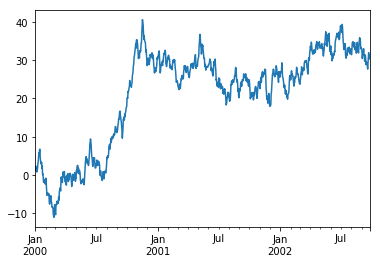

In [119]:
%matplotlib inline
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

On DataFrame, [plot()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot) is a convenience to plot all of the columns with labels:

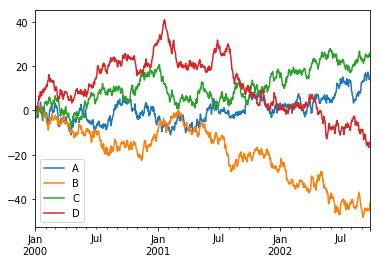

In [123]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])

df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

In [127]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
df.head()

,A,B,C,D
2000-01-01,-1.329746,-0.442946,-0.627402,-0.459685
2000-01-02,1.078716,-0.085031,-0.569936,-0.190314
2000-01-03,-0.598833,0.989920,0.962348,0.200185
2000-01-04,1.253077,3.000442,0.944897,1.432317
2000-01-05,0.022414,-0.818577,-0.096092,0.336800


# Reference
http://pandas.pydata.org/pandas-docs/stable/10min.html